# Хакатон Raifhack DS

*24-26 сентября 2021 года*

*Задача оценки коммерческой недвижимости, целевая величина per_square_meter_price*

**Скор на паблике: 1.58**

**Скор на привате: 1.35**

**Место 140/377**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Загрузка данных

In [2]:
# обучающая выборка
df_train = pd.read_csv('train.csv', dtype ={'floor' : 'str'})
df_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [3]:
# тестовая выборка 
df_test = pd.read_csv('test.csv', dtype ={'floor' : 'str'})
df_test.head()

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,0,0,1,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,0,0,7,8,13,4.084249,Сургут,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,3,6,7,0,3,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1
2,Тюмень,-1.0,COL_289318,3,28,67,122,0,0,0,0,0,9,18,34,1.291974,Тюмень,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,0,2,5,0,1,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1
3,Иркутск,1.0,COL_289354,5,76,139,231,0,0,0,0,0,28,52,84,0.914598,Иркутск,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,1,5,5,0,7,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1
4,Курск,NaN,COL_289399,8,105,189,279,0,0,2,9,1,24,40,54,1.300135,Курск,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,4,5,12,0,2,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1


Конкатенация обучающей и тестовой выборки для разработки единого пайплайна предобработки данных.

Добавляется бинарный признак is_train для последующего сплита данных.

In [4]:
df_train['is_train'] = 1
df_test['is_train'] = 0
df_full = pd.concat([df_train, df_test], axis = 0)
df_full.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,is_train
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,1
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,1
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,1
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,1
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,1


Общая информация о выборке:

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282766 entries, 0 to 2973
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 282766 non-null  object 
 1   floor                                105228 non-null  object 
 2   id                                   282766 non-null  object 
 3   lat                                  282766 non-null  float64
 4   lng                                  282766 non-null  float64
 5   osm_amenity_points_in_0.001          282766 non-null  int64  
 6   osm_amenity_points_in_0.005          282766 non-null  int64  
 7   osm_amenity_points_in_0.0075         282766 non-null  int64  
 8   osm_amenity_points_in_0.01           282766 non-null  int64  
 9   osm_building_points_in_0.001         282766 non-null  int64  
 10  osm_building_points_in_0.005         282766 non-null  int64  
 11  osm_building_po

Видно присутствие null значений. Построим график по признакам:

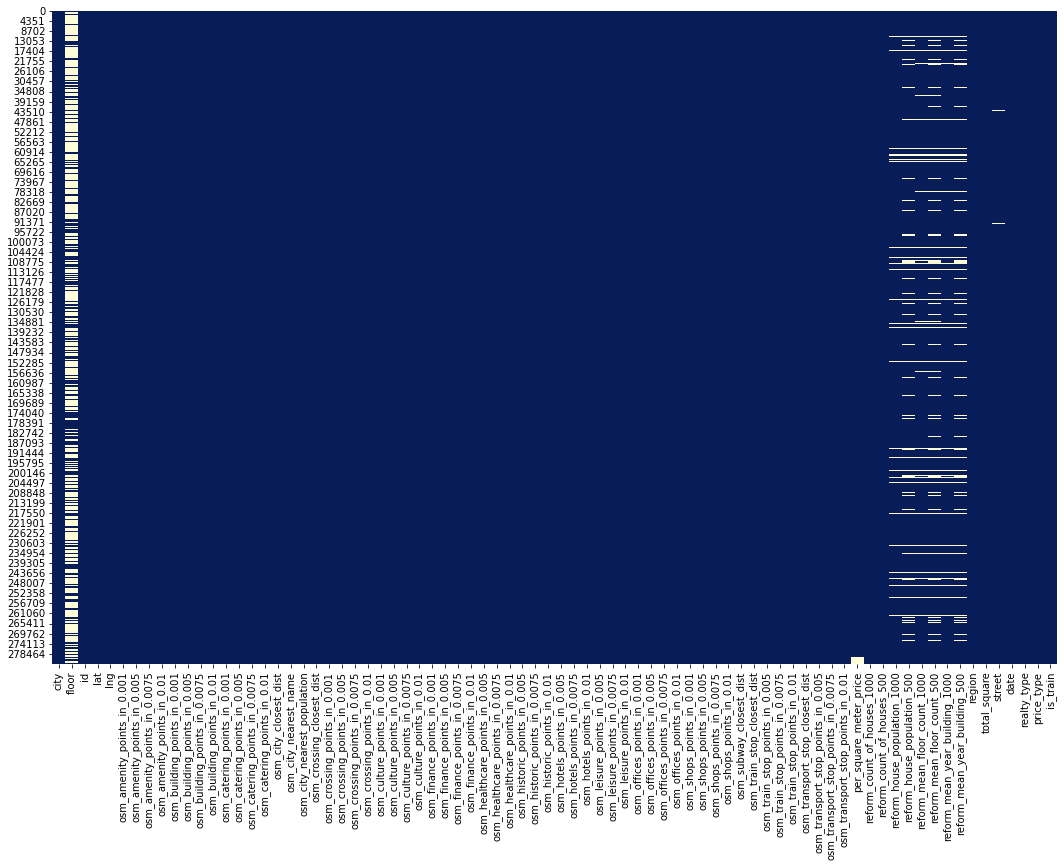

In [6]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_full.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

# Предобработка данных

## Обработка признака date

Для обработки признака date была реализована функция get_time_features, формирующая временные признаки из даты

In [7]:
def get_time_features(df):
    '''
    Формирует time-признаки
    :param df: dataframe, обучающая выборка
    :return: dataframe
    '''
    df_new = df.copy()
    
    df_new['date'] = pd.to_datetime(df_new['date'], format='%Y-%m-%d')

    df_new['year'] = df_new['date'].dt.year 
    df_new['month'] = df_new['date'].dt.month 
    df_new['day'] = df_new['date'].dt.day

    df_new['dayofweek_num'] = df_new['date'].dt.dayofweek  
    df_new['quarter'] = df_new['date'].dt.quarter

    df_new['dayofyear'] = df_new['date'].dt.dayofyear  
    df_new['weekofyear'] = df_new['date'].dt.weekofyear
    
    return df_new

In [8]:
df_full = get_time_features(df_full)
df_full.head()

C:\Users\stasa\AppData\Local\Temp/ipykernel_2604/2867194215.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_new['weekofyear'] = df_new['date'].dt.weekofyear


,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,is_train,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,1,2020,1,5,6,1,5,1
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,1,2020,1,5,6,1,5,1
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,1,2020,1,5,6,1,5,1
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,1,2020,1,5,6,1,5,1
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,1,2020,1,5,6,1,5,1


## Обработка признака floor

In [9]:
pd.unique(df_full['floor'])

array([nan, '3.0', '4.0', '-1.0', '1.0', '14.0', '2.0', '8.0', '-2.0',
       '6.0', '10.0', '5.0', '16.0', '19.0', '7.0', '9.0', '58.0', '24.0',
       '18.0', '26.0', '17.0', '48.0', '11.0', '-3.0', '15.0', '22.0',
       '60.0', '12.0', '21.0', '35.0', '28.0', '38.0', '39.0', '13.0',
       '81.0', '44.0', '82.0', '25.0', '45.0', '47.0', '23.0', '37.0',
       '29.0', '113.0', '78.0', '42.0', '69.0', '27.0', '46.0', '53.0',
       '80.0', '70.0', '76.0', '64.0', '30.0', '73.0', '77.0', '52.0',
       '67.0', '65.0', '20.0', '40.0', '49.0', '75.0', '93.0', '94.0',
       '91.0', '72.0', '79.0', '84.0', '92.0', '33.0', '66.0', '90.0',
       '31.0', '36.0', '61.0', '71.0', '68.0', '51.0', '97.0', '43.0',
       '95.0', '85.0', '50.0', '0.0', '62.0', '54.0', '74.0', '57.0',
       '41.0', '34.0', '59.0', '56.0', '123.0', '55.0', '83.0', '1',
       'подвал, 1', '2', 'подвал', 'цоколь, 1', '1,2,антресоль', 'цоколь',
       '4', '5', 'тех.этаж (6)', '3', 'Подвал', 'Цоколь', '10',
       

Признак floor имеет очень много пропущенных значений, но этаж вносит существенный вклад в оценку коммерческой недвижимости. Было выявлено, что цена элементов выборки с null значениями в признаке floor cхожа с ценой 4-х этажных помещений, поэтому было решено заменить все пропуски на значение '1,2,3,4'

Кроме того, в признаке floor встречаются строковые значения (подвал, тех. этаж, антресоль, мансарда, цоколь), их комбинации с номерами этажей (цоколь, 1, 2,3), диапазоны этажей (1-4; 1:4), последовательности этажей (1,2,3), скобки, пробелы и другие лишние символы. Необходимо написать обработчик данного признака.

Для обработки признака floor была реализована функция preproc_floors

Строковые значения обрабатываются по префиксу и для них создаются отдельные бинарные признаки : basement (наличие подвала или цоколя), mezzanine (наличие антресоли и мансарды), tech (наличие тех этажа)

Если кроме строкового значения ничего нет, то кодируем как 'chek_new_columns'

Создаётся новый признак 'num_floors' -  количество этажей в помещении

Числовые значения приводятся к единому формату, например  '['1', '2', '3']', удобному для дальнейшего label encoding

In [10]:
import re


def preproc_floors(df):
    '''
    Обработка признака floor
    :param df: dataframe, обучающая выборка
    :return: dataframe
    '''
    # заполнение null значений
    df['floor'] = df['floor'].fillna(value = '1,2,3,4')
    # пирведение к нижнему регистру 
    floor = df['floor'].str.lower().to_numpy()
    num_floors = [] # кол-во этажей
    res_floors = [] # итоговое значение для элементов выборки 
    basement = [] # наличие подвала или цоколя
    mezzanine = [] # наличие антресоли и мансарды
    tech = [] # наличие тех этажа
    for item in floor:
        count_floors = 0
        # обработка строковых значений    
        if 'подв' or 'цок' in item:
            basement.append(1)
            count_floors += 1 # или 2
        else:
            basement.append(0)
            
        if 'манса' or 'антре' or 'мезо' in item:
            mezzanine.append(1)
            count_floors += 1 # или 2
            
        else:
            mezzanine.append(0)
            
        if 'тех' in item:
            tech.append(1)
            count_floors += 1 
        else:
            tech.append(0)
            
        item = re.sub('[^\d\. - :]',' ', item)
        item = item.replace('-', '.').replace(':', '.')
        # обработка числовых значений
        new_item = item.split()
        if len(new_item) == 0:
            num_floors.append(count_floors)
            res_floors.append('chek_new_columns')
            continue
        elif len(new_item) == 1:
            if '.' in new_item[0]:
                last_item = new_item[0].split('.')
                if last_item[-1] == '0':
                    count_floors += 1 
                    num_floors.append(count_floors)
                    res_floors.append(str(last_item[:-1]).replace(', \'.\'', '').replace('\'.\', ', ''))
                    continue
                else:
                    count_floors += len(range(int(last_item[0]), int(last_item[-1]) + 1))
                    num_floors.append(count_floors)
                    res_floors.append(str(last_item).replace(', \'.\'', '').replace('\'.\', ', ''))
                    continue
            else:
                count_floors += 1 
                num_floors.append(count_floors)
                res_floors.append(str(new_item).replace(', \'.\'', '').replace('\'.\', ', ''))
                continue
        else:
            count_floors += len(new_item) - 2
            num_floors.append(count_floors)
            res_floors.append(str(new_item).replace(', \'.\'', '').replace('\'.\', ', ''))
            
    df = df.drop(['floor'], axis = 1)
    df['floor'] = res_floors
    df['num_floors'] = num_floors
    df['basement'] = basement
    df['mezzanine'] = mezzanine
    df['tech'] = tech
            
    return df


In [11]:
df_full = preproc_floors(df_full)
df_full.head()

,city,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,is_train,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,Пермь,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
1,Шатура,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
2,Ярославль,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
3,Новокузнецк,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
4,Москва,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0


In [12]:
pd.unique(df_full['floor'])

array(["['1', '2', '3', '4']", "['3']", "['4']", "['1']", "['14']",
       "['2']", "['8']", "['6']", "['10']", "['5']", "['16']", "['19']",
       "['7']", "['9']", "['58']", "['24']", "['18']", "['26']", "['17']",
       "['48']", "['11']", "['15']", "['22']", "['60']", "['12']",
       "['21']", "['35']", "['28']", "['38']", "['39']", "['13']",
       "['81']", "['44']", "['82']", "['25']", "['45']", "['47']",
       "['23']", "['37']", "['29']", "['113']", "['78']", "['42']",
       "['69']", "['27']", "['46']", "['53']", "['80']", "['70']",
       "['76']", "['64']", "['30']", "['73']", "['77']", "['52']",
       "['67']", "['65']", "['20']", "['40']", "['49']", "['75']",
       "['93']", "['94']", "['91']", "['72']", "['79']", "['84']",
       "['92']", "['33']", "['66']", "['90']", "['31']", "['36']",
       "['61']", "['71']", "['68']", "['51']", "['97']", "['43']",
       "['95']", "['85']", "['50']", "['0']", "['62']", "['54']",
       "['74']", "['57']", "['41']", "['34']", 

## Обработка null значений 

В выборке много пропущенных значений в признаках:
* reform_house_population_1000, reform_house_population_500 (Коэффициент количества проживающих людей в радиусе 500/1000 метров);

* reform_mean_floor_count_1000, reform_mean_floor_count_500 (Средняя этажность домов в радиусе 500/1000 метров); 

* reform_mean_year_building_1000, reform_mean_year_building_500 (Среднее значение года постройки домов в радиусе 500/1000 метров)

Предлагается заполнить эти значения как среднее значение по региону, в котором находится помещение. В идеале можно было бы заполнять как среднее по городу, однако в выборке присутсвуют города, в которых все значения null. Для обработки была реализована функция fill_na.

In [13]:
def fill_na(df):
    '''
    Обработка null значений 
    :param df: dataframe, обучающая выборка
    :return: dataframe
    '''
    group1 =  df[~df['reform_house_population_1000'].isna()].groupby(['region'])['reform_house_population_1000']
    group2 =  df[~df['reform_house_population_500'].isna()].groupby(['region'])['reform_house_population_500']
    group3 =  df[~df['reform_mean_floor_count_1000'].isna()].groupby(['region'])['reform_mean_floor_count_1000']
    group4 =  df[~df['reform_mean_floor_count_500'].isna()].groupby(['region'])['reform_mean_floor_count_500']
    group5 =  df[~df['reform_mean_year_building_1000'].isna()].groupby(['region'])['reform_mean_year_building_1000']
    group6 =  df[~df['reform_mean_year_building_500'].isna()].groupby(['region'])['reform_mean_year_building_500']
    
    df['reform_house_population_1000'] = df.apply(lambda x: np.mean(group1.groups[x['region']])\
                                                    if x['reform_house_population_1000'] != x['reform_house_population_1000']\
                                                    else x['reform_house_population_1000'], axis = 1)
    df['reform_house_population_500'] = df.apply(lambda x: np.mean(group1.groups[x['region']])\
                                                    if x['reform_house_population_500'] != x['reform_house_population_500']\
                                                    else x['reform_house_population_500'], axis = 1)
    df['reform_mean_floor_count_1000'] = df.apply(lambda x: np.mean(group1.groups[x['region']])\
                                                    if x['reform_mean_floor_count_1000'] != x['reform_mean_floor_count_1000']\
                                                    else x['reform_mean_floor_count_1000'], axis = 1)
    df['reform_mean_floor_count_500'] = df.apply(lambda x:  np.mean(group1.groups[x['region']])\
                                                    if x['reform_mean_floor_count_500'] != x['reform_mean_floor_count_500']\
                                                    else x['reform_mean_floor_count_500'], axis = 1)
    df['reform_mean_year_building_1000'] = df.apply(lambda x: np.mean(group1.groups[x['region']])\
                                                    if x['reform_mean_year_building_1000'] != x['reform_mean_year_building_1000']\
                                                    else x['reform_mean_year_building_1000'], axis = 1)
    df['reform_mean_year_building_500'] = df.apply(lambda x: np.mean(group1.groups[x['region']])\
                                                    if x['reform_mean_year_building_500'] != x['reform_mean_year_building_500']\
                                                    else x['reform_mean_year_building_500'], axis = 1)
    # обработка пустых значений в признаке street (улица)
    df['street'] = df['street'].fillna(value = 'Unknown')
    
    return df

In [14]:
df_full = fill_na(df_full)

df_full.head()

,city,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,is_train,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,Пермь,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
1,Шатура,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
2,Ярославль,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
3,Новокузнецк,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
4,Москва,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0


## Обработка взаимно коррелирующих признаков

Построим матрицу корреляций Пирсона 

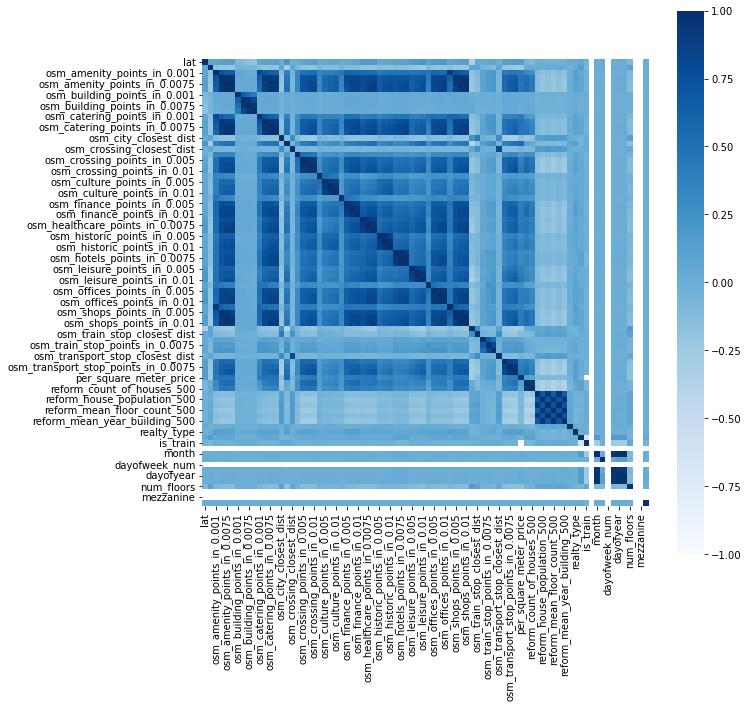

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_full.corr(), vmin=-1, cmap='Blues', square=True)
plt.show()

По матрице корреляций видно, что присутствуют тройки и четвёрки признаков о расположении некоторых объектов в радиусе от 100 метров до 1000 метров (формат osm_something_points_in_distance). 

Предлагается оставить только самый маленький радиус (100 метров) и самый большой (1000 метров), так как близлежащие объекты наиболее важны при оценке, а самый большой радиус покрывает все объекты, которые находятся ближе.

Также удалим признаки lat (широта), lng (долгота) и street (улица), так как у нас уже есть данные о городе, регионе и расстоянии до центра города, то есть мы можем однозначно определить местоположение

id - уникальный индекс каждого элемента обучающей выборки, можно удалить

data (дата оценки) : временные признаки были выделены с помощью функции get_time_features, поэтому дата больше не несёт информации, удаляем.

In [16]:
df_full = df_full.drop(['osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.005'], axis = 1)
df_full = df_full.drop(['osm_building_points_in_0.005', 'osm_building_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_healthcare_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_historic_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_hotels_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_leisure_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_train_stop_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['osm_transport_stop_points_in_0.0075'], axis = 1)
df_full = df_full.drop(['street','lat','lng'], axis = 1)
df_full = df_full.drop(['id', 'date'], axis = 1)

In [17]:
df_full.head()

,city,osm_amenity_points_in_0.001,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,is_train,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,Пермь,4,52,0,0,0,6,3.293470,Пермь,1055397.0,0.027732,3,34,0,1,0,2,2,4,0,1,0,0,0,2,0,4,4,28,269.024986,3.368385,0,0,0.002864,4,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
1,Шатура,3,59,0,1,0,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,57,0,3,0,2,1,3,2,6,2,2,1,2,0,3,1,29,102.455451,1.476600,0,0,0.154661,4,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
2,Ярославль,1,128,0,1,0,11,2.676293,Ярославль,603961.0,0.200995,0,53,0,2,0,9,0,3,0,0,0,1,2,6,0,9,1,80,243.361937,1.455127,0,0,0.118275,9,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
3,Новокузнецк,0,21,0,1,0,4,15.618563,Новокузнецк,552105.0,0.861400,0,5,0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,11,295.633502,9.400855,0,0,1.036523,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,110,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0
4,Москва,1,153,0,1,0,26,9.995325,Химки,232066.0,0.236744,0,78,0,0,0,9,2,14,0,2,1,3,3,9,0,12,0,89,1.110429,1.235503,0,0,0.235032,10,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,10,0,1,2020,1,5,6,1,5,1,"['1', '2', '3', '4']",4,1,1,0


## Label encoding

Закодируем категориальные признаки с помощью label encoder, чтобы не сильно "раздувать" пространство признаков.

In [18]:
from sklearn import preprocessing


def number_encode_features(df):
    result = df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object':
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [19]:
df_full_encoded, _ = number_encode_features(df_full)

df_full_encoded.head()

,city,osm_amenity_points_in_0.001,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,is_train,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,3063,4,52,0,0,0,6,3.293470,109,1055397.0,0.027732,3,34,0,1,0,2,2,4,0,1,0,0,0,2,0,4,4,28,269.024986,3.368385,0,0,0.002864,4,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,31,32.0,10,0,1,2020,1,5,6,1,5,1,3,4,1,1,0
1,4442,3,59,0,1,0,6,43.950989,104,120184.0,0.089441,0,57,0,3,0,2,1,3,2,6,2,2,1,2,0,3,1,29,102.455451,1.476600,0,0,0.154661,4,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,25,280.0,10,0,1,2020,1,5,6,1,5,1,3,4,1,1,0
2,4615,1,128,0,1,0,11,2.676293,167,603961.0,0.200995,0,53,0,2,0,9,0,3,0,0,0,1,2,6,0,9,1,80,243.361937,1.455127,0,0,0.118275,9,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,48,297.4,110,0,1,2020,1,5,6,1,5,1,3,4,1,1,0
3,2683,0,21,0,1,0,4,15.618563,89,552105.0,0.861400,0,5,0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,11,295.633502,9.400855,0,0,1.036523,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,14,190.0,110,0,1,2020,1,5,6,1,5,1,3,4,1,1,0
4,2465,1,153,0,1,0,26,9.995325,156,232066.0,0.236744,0,78,0,0,0,9,2,14,0,2,1,3,3,9,0,12,0,89,1.110429,1.235503,0,0,0.235032,10,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,24,60.2,10,0,1,2020,1,5,6,1,5,1,3,4,1,1,0


После энкодинга построим итоговый график null значений и проверим, всё ли хорошо

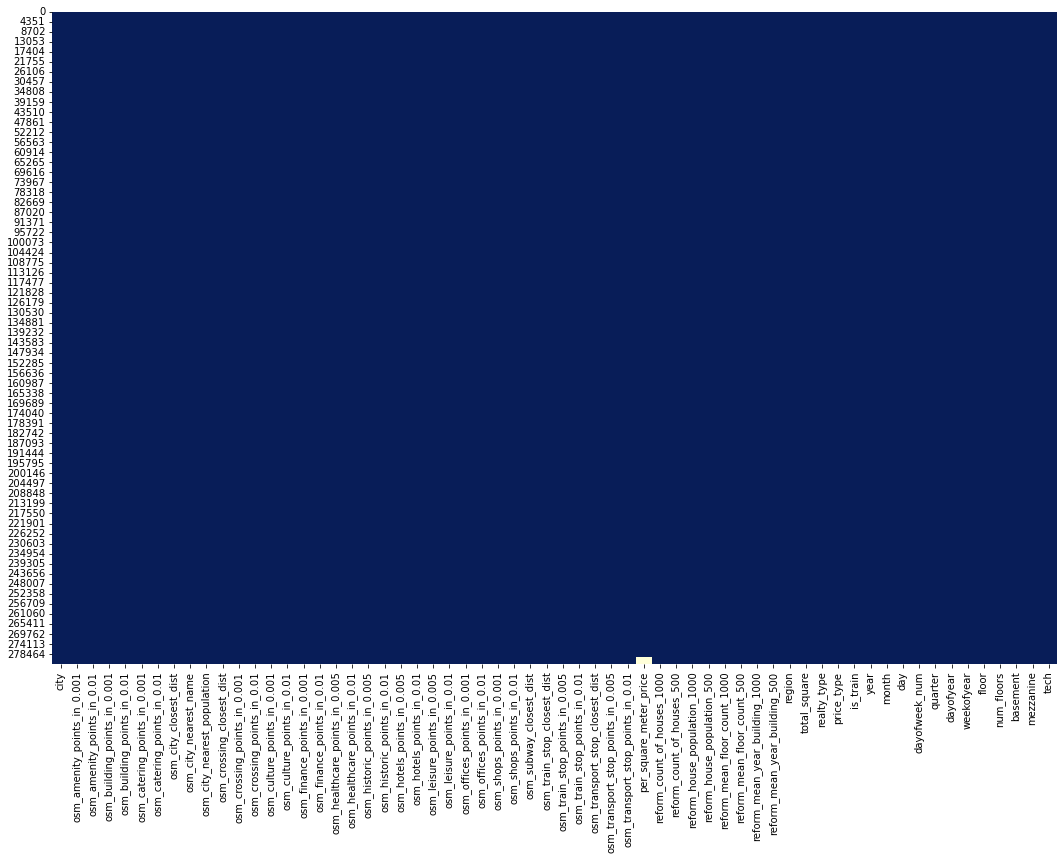

In [20]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_full_encoded.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

# Обучение модели

## Data split

Разделим данные на train и test по признаку is_train и удалим его:

In [21]:
df_train = df_full_encoded[df_full_encoded['is_train'] == 1].copy().drop(['is_train'], axis = 1)
df_test = df_full_encoded[df_full_encoded['is_train'] == 0].copy().drop(['is_train'], axis = 1)

In [22]:
df_train = df_train.dropna() # на всякий случай :)
df_train.head()

,city,osm_amenity_points_in_0.001,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,3063,4,52,0,0,0,6,3.293470,109,1055397.0,0.027732,3,34,0,1,0,2,2,4,0,1,0,0,0,2,0,4,4,28,269.024986,3.368385,0,0,0.002864,4,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,31,32.0,10,0,2020,1,5,6,1,5,1,3,4,1,1,0
1,4442,3,59,0,1,0,6,43.950989,104,120184.0,0.089441,0,57,0,3,0,2,1,3,2,6,2,2,1,2,0,3,1,29,102.455451,1.476600,0,0,0.154661,4,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,25,280.0,10,0,2020,1,5,6,1,5,1,3,4,1,1,0
2,4615,1,128,0,1,0,11,2.676293,167,603961.0,0.200995,0,53,0,2,0,9,0,3,0,0,0,1,2,6,0,9,1,80,243.361937,1.455127,0,0,0.118275,9,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,48,297.4,110,0,2020,1,5,6,1,5,1,3,4,1,1,0
3,2683,0,21,0,1,0,4,15.618563,89,552105.0,0.861400,0,5,0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,11,295.633502,9.400855,0,0,1.036523,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,14,190.0,110,0,2020,1,5,6,1,5,1,3,4,1,1,0
4,2465,1,153,0,1,0,26,9.995325,156,232066.0,0.236744,0,78,0,0,0,9,2,14,0,2,1,3,3,9,0,12,0,89,1.110429,1.235503,0,0,0.235032,10,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,24,60.2,10,0,2020,1,5,6,1,5,1,3,4,1,1,0


In [23]:
df_test.head()

,city,osm_amenity_points_in_0.001,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,year,month,day,dayofweek_num,quarter,dayofyear,weekofyear,floor,num_floors,basement,mezzanine,tech
0,2059,7,117,0,0,0,10,4.101661,66,443212.0,0.147072,0,19,0,0,1,3,5,5,2,4,7,8,0,1,0,1,5,83,435.363535,5.636811,0,0,0.108668,11,27,NaN,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,20,156.148996,100,1,2020,9,6,6,3,250,36,11,3,1,1,0
1,3801,8,140,0,0,0,13,4.084249,139,380632.0,0.162480,0,50,0,1,1,6,3,8,1,1,3,5,3,7,0,8,4,99,693.447931,9.641591,0,0,0.091416,9,19,NaN,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,46,190.737943,110,1,2020,9,6,6,3,250,36,11,3,1,1,0
2,4095,3,122,0,0,0,34,1.291974,149,744554.0,0.075807,1,92,0,2,0,5,2,3,1,5,0,1,0,5,0,3,3,63,298.904686,1.803999,0,0,0.120308,6,29,NaN,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,43,457.118051,10,1,2020,9,6,6,3,250,36,11,3,1,1,0
3,1385,5,231,0,0,0,84,0.914598,45,623562.0,0.043604,1,95,1,18,0,10,5,12,12,32,1,18,1,5,0,16,3,51,60.224709,1.338052,0,0,0.079332,9,29,NaN,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,10,66.503622,100,1,2020,9,6,6,3,250,36,11,3,1,1,0
4,2059,8,279,0,9,1,54,1.300135,66,443212.0,0.084204,1,84,1,12,3,21,2,6,10,17,1,1,4,12,0,16,1,156,432.530106,2.440972,0,0,0.093642,12,37,NaN,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,20,23.864915,10,1,2020,9,6,6,3,250,36,3,4,1,1,0


In [24]:
df_train.shape, df_test.shape

((279737, 61), (2974, 61))

Выделим целевую величину из обучающей выборки и преобразуем в np.array:

In [25]:
y_train = np.array(df_train['per_square_meter_price'], float) # ответы
y_train

array([139937.5       ,  60410.71428571,  45164.76126429, ...,
        35758.84725924,  38755.03832223,  41335.01476172])

Удалим целевую величину из обучающей выборки и преобразуем обучающую выборку в np.array:

In [26]:
df_train = df_train.drop(['per_square_meter_price'], axis= 1)
X_train = np.array(df_train, float)
X_train

array([[3.063e+03, 4.000e+00, 5.200e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.442e+03, 3.000e+00, 5.900e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.615e+03, 1.000e+00, 1.280e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.497e+03, 0.000e+00, 8.400e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.586e+03, 5.000e+00, 1.340e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.640e+03, 1.000e+00, 1.130e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [27]:
X_train.shape

(279737, 60)

Удалим целевую величину из тестовой выборки (она везде null) и преобразуем тестовой выборку в np.array:

In [28]:
df_test = df_test.drop(['per_square_meter_price'], axis= 1)
X_test = np.array(df_test, float)
X_test

array([[2.059e+03, 7.000e+00, 1.170e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.801e+03, 8.000e+00, 1.400e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.095e+03, 3.000e+00, 1.220e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.511e+03, 2.000e+00, 9.900e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.624e+03, 1.300e+01, 1.580e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.624e+03, 1.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [29]:
X_test.shape

(2974, 60)

## Cat Boost Regressor

Для решения задачи оценки стоимости коммерческой недвижимости была выбрана модель CatBoostRegressor, функция потерь MAE, 5000 итераций с learning rate 0.1

Инициализация и обучение модели:

In [28]:
from catboost import CatBoostRegressor, Pool

model = CatBoostRegressor(iterations=5000,
                          loss_function = 'MAE',
                          task_type="CPU",
                            learning_rate= 0.01,
                          )

model.fit(X = np.array(X_train, float),
            y = np.array(y_train, float),
            verbose = 1000,
            early_stopping_rounds=500)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 80233.4650637	total: 141ms	remaining: 11m 45s
1000:	learn: 47047.6540872	total: 1m 48s	remaining: 7m 14s
2000:	learn: 44581.5953036	total: 3m 33s	remaining: 5m 19s
3000:	learn: 42880.3828668	total: 5m 19s	remaining: 3m 32s
4000:	learn: 41689.6365719	total: 7m 4s	remaining: 1m 45s
4999:	learn: 40785.3651863	total: 8m 48s	remaining: 0us


Предсказания модели:

In [29]:
preds_cb = model.predict(X_test)
preds_cb

array([38427.1211068 , 60558.18239932, 60799.91374782, ...,
       47630.53911465, 68855.23757641, 49360.41473234])

Преобразование в формат для отправки решения:

In [32]:
df_test_tmp = pd.read_csv('test.csv')

res = df_test_tmp[['id']]
res['per_square_meter_price'] = preds_cb

# для лучшего скоро корректировка: без 1.66, с 1.58
res['per_square_meter_price'] *= 0.95

res.to_csv('res.csv', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
pd.read_csv('res.csv')

,id,per_square_meter_price
0,COL_289284,42877.552816
1,COL_289305,70376.862273
2,COL_289318,63738.557915
3,COL_289354,95276.985028
4,COL_289399,63691.410967
...,...,...
2969,COL_455089,34583.480588
2970,COL_455212,54411.481167
2971,COL_455261,64142.768755
2972,COL_455381,67230.553273


# Выводы по проделанной работе

Полученный скор на паблике: 1.58, скор на привате: 1.35, место 140/377, для первого хакатона неплохо :)

Предобработка данных не идеальна и разумеется нуждается в доработке. Можно обрезать выборку, поискать признаки с нелинейными и немонотонными зависимостями (критерий хи и корреляция спирмана), использовать one hot encoding вместо label encoding.

Были попытки генерации новых территориальных фич, мэтчинга с данными в открытом доступе (инфляция, средний доход населения в регионе и тп), но скор становился хуже (значит были выбраны не те данные :) ) При правильном поиске дополнительных признаков можно улучшить скор.

В плане выбора модели можно попробовать потюнить catboost для поиска лучших гиперпараметров, постэкать несколько моделей и получить лучший скор. 

Решение довольно простое, но опыт, полученный при работе с реальными данными неоценим. Главной ошибкой было не следовать золотому правилу построения бейслайна на простом решении, чтобы было от чего отталкиваться. Первые попытки сразу базировались на генерации кучи новых фич и "раздувании" пространства признаков а не его минимизации, прибавим к этому невнимательность и неопытность и получим плохой скор ... В результате чего данное простое решение было получено окло 7 утра последнего дня хакатона. Первый блин комом, как говорится, в следующий раз ошибки будут учтены!